In [1]:
from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
import pyspark

from pyspark.ml import classification

import time
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
import pyspark
from pyspark.ml import feature, regression, Pipeline
from pyspark.ml.classification import RandomForestClassifier as rf
from pyspark.sql import functions as fn, Row
from pyspark import sql
import re

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read excel file:
diabetic_df = spark.read.csv('diabetic_data.csv', header = True)

In [3]:
#DAta summary of the dataset:
diabetic_df.toPandas().describe().transpose()

,count,unique,top,freq
encounter_id,101766,101766,138303666,1
patient_nbr,101766,71518,88785891,40
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
admission_type_id,101766,8,1,53990
discharge_disposition_id,101766,26,1,60234
admission_source_id,101766,17,7,57494
time_in_hospital,101766,14,3,17756


#### Using Pandas for exploring and cleaning data

In [4]:
diabetic_df_pd = pd.read_csv('diabetic_data.csv')

In [5]:
diabetic_df_pd

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Replacing '?' with NAN
df=diabetic_df_pd.replace("?", "NaN")

In [7]:
# remove ID variables
df.drop(['encounter_id', 'patient_nbr', 'admission_type_id',
             'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [8]:
#dropping columns with high NA percentage
df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)

In [9]:
#removing range from the age column:
df['age'] = df['age'].str[1:].str.split('-',expand=True)[0]
df['age'] = df['age'].astype(int)

In [10]:
#Removing alphabets and special char from diag_cols
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)

In [11]:
# diagnosis grouping
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)

df.dropna(inplace=True)

#### Column data mugging:


In [12]:
max_glu_serum_dict = {'None':0,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_dict)

In [13]:
A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)


In [14]:
change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

In [15]:
diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)


In [16]:
d24_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':0,
                    'No':-20
                   }
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in d24_cols:
    df[col] = df[col].replace(d24_feature_dict)

condition = df['readmitted']!='NO'
df['readmitted'] = np.where(condition,1,0)


In [42]:
cat_cols = list(df.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,Respiratory,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory
0,0,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,10,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,0
2,20,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
3,30,2,44,1,16,0,0,0,7,0,...,0,1,0,0,0,0,0,0,0,0
4,40,1,51,0,8,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0


### Algorithms

In [18]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

import sklearn.metrics 

import matplotlib.pyplot as plt

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('readmitted',axis=1),
                                                 df['readmitted'],
                                                 test_size=0.05,
                                                 random_state=2)
X_train.shape,X_test.shape

((96677, 72), (5089, 72))

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [21]:
ML_models = {}
model_index = ['LR','RF','NN']
model_sklearn = [LogisticRegression(solver='liblinear',random_state=0),
                 RandomForestClassifier(n_estimators=100,random_state=0),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0)]
model_summary = []
for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1])])
ML_models

{'LR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
           tol=0.0001, verbose=0, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 'NN': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=True, epsilon=1e-08,
        hidden_layer_sizes=[100, 100, 100, 100, 100],
        learning_rate='adaptive', learning_rate_init=0.001, max_iter=200,
        momentum=0.9, n_iter_

In [22]:
# model summary:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy','AUC_ROC'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy,AUC_ROC
0,0,LR,0.593927,0.607781,0.644347
1,1,RF,0.607293,0.612891,0.651270
2,2,NN,0.616550,0.620358,0.658460


## Feature Importance

### 1.PCA

In [17]:
#creating a separate spark data frame:
df = spark.createDataFrame(df)

In [18]:
# Make a training, validation, and test split #
training_df, validation_df, testing_df = df.randomSplit([0.6, 0.3, 0.1], seed=0)

In [19]:
## Use StringIndexer to create index columns ##
indexer_cols = ['diag_1','diag_2','diag_3']
indexers = [feature.StringIndexer(inputCol = column, 
                                  outputCol = column+"_index", handleInvalid = "skip")\
            .fit(df) for column in indexer_cols]

In [20]:
## Indexer Pipeline ##
df_indexerpipe = Pipeline(stages = indexers)
d_df = df_indexerpipe.fit(df).transform(df)

In [21]:
#Making dummy columns and roveming unwanted categorical features 
my_col= df.schema.names
my_col.remove('race')
my_col.remove('gender')
my_col.remove('readmitted')
my_col.remove('diag_1')
my_col.remove('diag_2')
my_col.remove('diag_3')

In [22]:
pipeline_diabetes = Pipeline(stages=[
    feature.VectorAssembler(inputCols= my_col,
                           outputCol='features'),
    feature.StandardScaler(withMean=True,
                           inputCol='features', outputCol='zfeatures'
                          ),
    feature.PCA(k=2, inputCol='zfeatures', outputCol='loadings')
]).fit(training_df)

In [23]:
principal_components = pipeline_diabetes.stages[-1].pc.toArray()

In [24]:
result = pipeline_diabetes.transform(training_df).select("loadings")

In [25]:
list(zip(my_col, principal_components[:, 0], principal_components[:, 1]))

[('age', -0.01763091681314203, 0.19399170108961272),
 ('time_in_hospital', -0.27906473074112875, 0.41639724595317573),
 ('num_lab_procedures', -0.20644329355429736, 0.3271217559389305),
 ('num_procedures', -0.13906159747308144, 0.2971942130241064),
 ('num_medications', -0.3830290908129881, 0.35043903700436935),
 ('number_outpatient', -0.029901028856876743, 0.044662869411935396),
 ('number_emergency', -0.03827310806550947, 0.0014871147028064566),
 ('number_inpatient', -0.05438964848855342, 0.09812562638321508),
 ('number_diagnoses', -0.16778798547711343, 0.35737536826218214),
 ('max_glu_serum', 0.02528775516850221, -0.051666199888841136),
 ('A1Cresult', -0.12450445912046831, -0.013292138775948868),
 ('metformin', -0.19228990633737736, -0.2963199650690133),
 ('repaglinide', -0.06536672393392005, 0.01427232868440524),
 ('nateglinide', -0.03998932386822564, -0.01900845680742849),
 ('chlorpropamide', 0.007332889007577427, -0.0006241785698226301),
 ('glimepiride', -0.10042939880244726, -0.05

In [26]:
# finf top features:
my_pc1={"my_pc1" :abs(principal_components[:, 0]), "my_pc2":abs(principal_components[:, 1])}
my_pc1=pd.DataFrame.from_dict(my_pc1)
my_pc1.columns = ['pc1', 'pc2']
my_pc2=['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']
my_pc2 = pd.DataFrame({'Features':my_pc2})

In [27]:

top_feature_result = pd.concat([my_pc2, my_pc1], axis=1, sort=False)

In [28]:
top_feature_result.sort_values(by = 'pc1', ascending=False).head(10)

,Features,pc1,pc2
34,glimepiride-pioglitazone,0.465303,0.274368
35,metformin-rosiglitazone,0.440880,0.303605
4,num_medications,0.383029,0.350439
28,tolazamide,0.367372,0.128479
1,time_in_hospital,0.279065,0.416397
2,num_lab_procedures,0.206443,0.327122
11,number_diagnoses,0.192290,0.296320
8,diag_1,0.167788,0.357375
3,num_procedures,0.139062,0.297194
17,chlorpropamide,0.133841,0.100885


In [29]:
top_feature_result.sort_values(by = 'pc2', ascending=False).head(10)

,Features,pc1,pc2
1,time_in_hospital,0.279065,0.416397
8,diag_1,0.167788,0.357375
4,num_medications,0.383029,0.350439
2,num_lab_procedures,0.206443,0.327122
35,metformin-rosiglitazone,0.440880,0.303605
3,num_procedures,0.139062,0.297194
11,number_diagnoses,0.192290,0.296320
34,glimepiride-pioglitazone,0.465303,0.274368
0,age,0.017631,0.193992
28,tolazamide,0.367372,0.128479


### 2.Random Forest

In [30]:
# Random Forest:
# Random Forest Pipeline #

rf_pipe = Pipeline(stages = [
    feature.VectorAssembler(inputCols=['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'change',
 'diabetesMed'], outputCol='features'),
    rf(numTrees=100, featuresCol='features',labelCol='readmitted',)
]).fit(training_df)


([<matplotlib.axis.YTick at 0x7f96ac80fa90>,
 <a list of 24 Text yticklabel objects>)

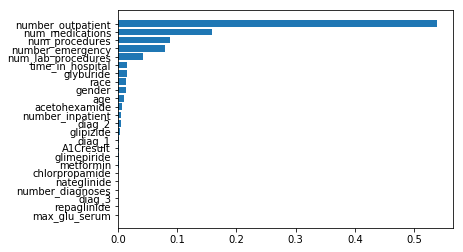

In [31]:
model = rf_pipe.stages[1]
import matplotlib.pyplot as pyplot
names = training_df.columns
imp = model.featureImportances
imp, names = zip(*sorted (zip(imp, names)))
plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)